# Chapter 9. R for Data Science - Layers

## Introduction

In Chapter 1, you learned much more than just how to make scatterplots, bar charts, and boxplots. You learned a foundation that you can use to make any type of plot with ggplot2.

In this chapter, you’ll expand on that foundation as you learn about the layered grammar of graphics. We’ll start with a deeper dive into aesthetic mappings, geometric objects, and facets. Then, you will learn about statistical transformations ggplot2 makes under the hood when creating a plot. These transformations are used to calculate new values to plot, such as the heights of bars in a bar plot or medians in a box plot. You will also learn about position adjustments, which modify how geoms are displayed in your plots. Finally, we’ll briefly introduce coordinate systems.

We will not cover every single function and option for each of these layers, but we will walk you through the most important and commonly used functionality provided by ggplot2 as well as introduce you to packages that extend ggplot2.


In [6]:
library(tidyverse)
library(gridExtra)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




## Aesthetic mappings

Remember that the mpg data frame bundled with the ggplot2 package contains 234 observations on 38 car models.

Among the variables in `mpg` are:

* `displ`: A car’s engine size, in liters. A numerical variable.
* `hwy`: A car’s fuel efficiency on the highway, in miles per gallon (mpg). A car with a low fuel efficiency consumes more fuel than a car with a high fuel efficiency when they travel the same distance. A numerical variable.
* `class`: Type of car. A categorical variable.

And remember that:
* The name of a color as a character string, e.g., color = "blue"
* The size of a point in mm, e.g., size = 1
* The shape of a point as a number, e.g, shape = 1.

You can learn more about all possible aesthetic mappings in the aesthetic specifications vignette at https://ggplot2.tidyverse.org/articles/ggplot2-specs.html.

In [7]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


Warning message:
"The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
i you have requested 7 values. Consider specifying shapes manually if you need
  that many have them."
Warning message:
"Removed 62 rows containing missing values (`geom_point()`)."


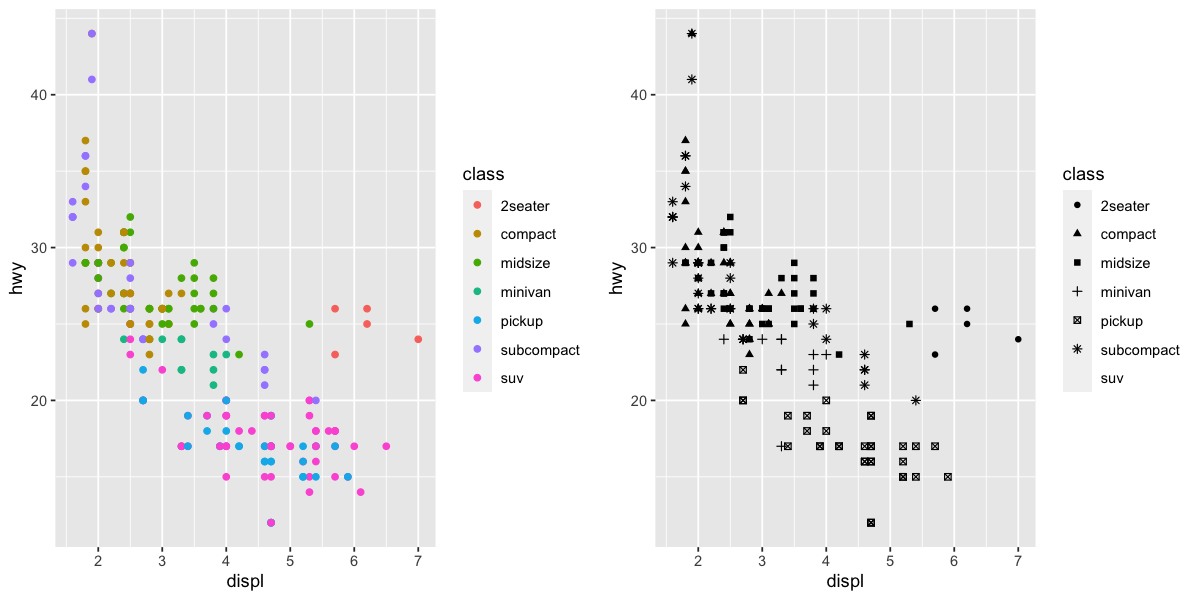

In [8]:
# Left
p1 <- ggplot(mpg, aes(x = displ, y = hwy, color = class)) +
  geom_point()

# Right
p2 <- ggplot(mpg, aes(x = displ, y = hwy, shape = class)) +
  geom_point()

options(repr.plot.width = 10, repr.plot.height = 5)
grid.arrange(p1, p2, ncol=2)

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Using alpha for a discrete variable is not advised."


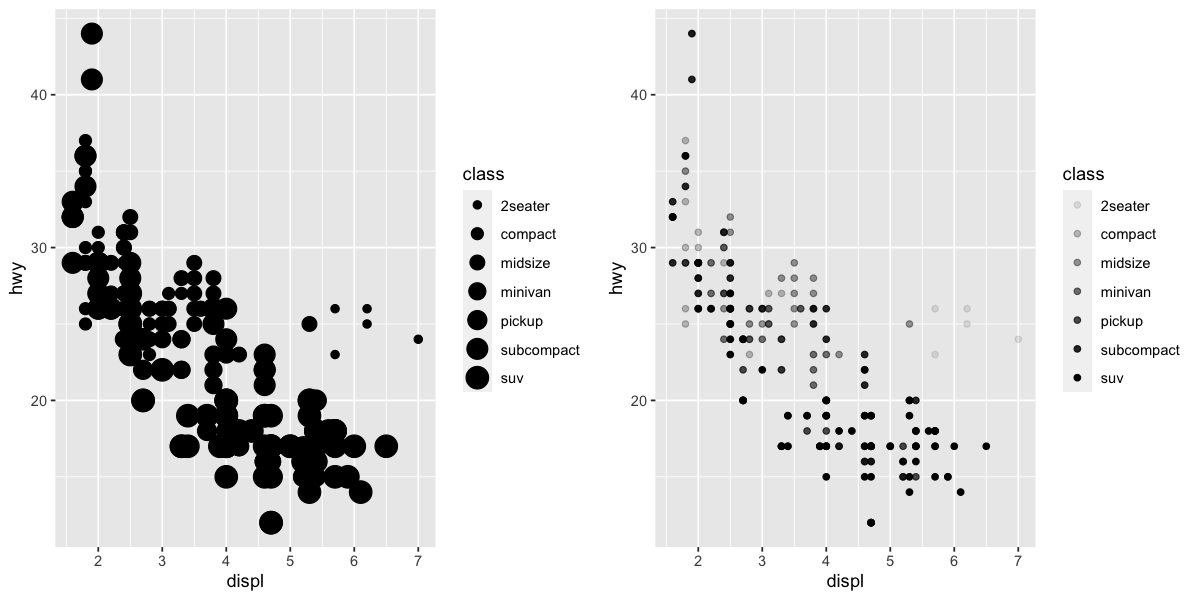

In [9]:
# Left
p1 <- ggplot(mpg, aes(x = displ, y = hwy, size = class)) +
  geom_point()
#> Warning: Using size for a discrete variable is not advised.

# Right
p2 <- ggplot(mpg, aes(x = displ, y = hwy, alpha = class)) +
  geom_point()
#> Warning: Using alpha for a discrete variable is not advised.

options(repr.plot.width = 10, repr.plot.height = 5)
grid.arrange(p1, p2, ncol=2)

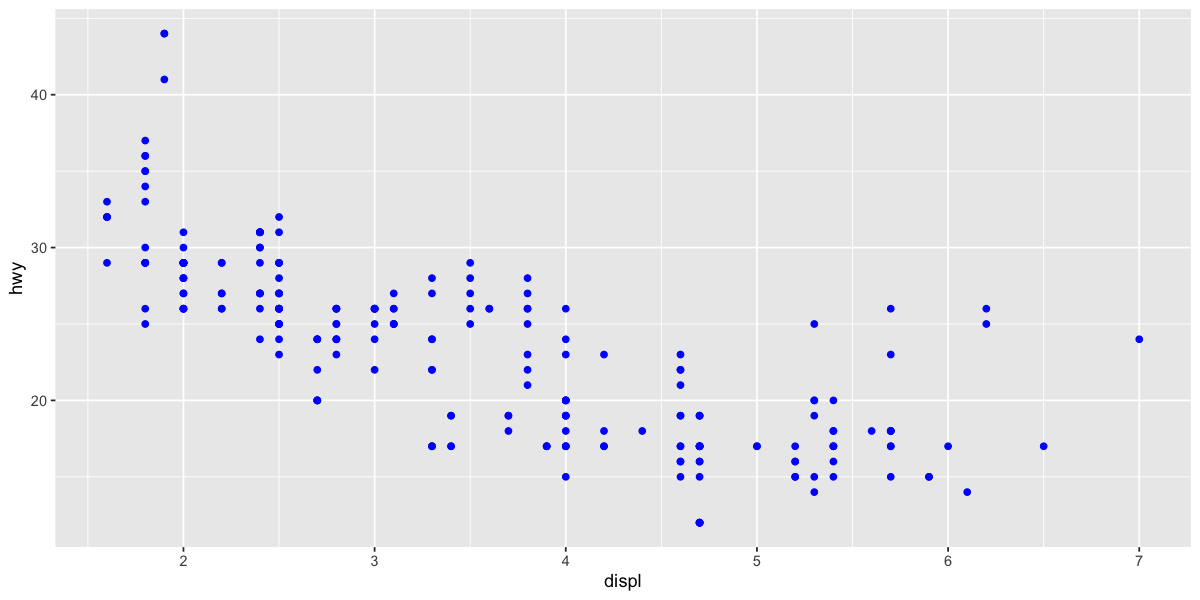

In [10]:
ggplot(mpg, aes(x = displ, y = hwy)) + 
  geom_point(color = "blue")

### Exercise 9.2
1. Create a scatterplot of hwy vs. displ where the points are pink filled in triangles.


In [42]:
print("hello")

[1] "hello"


2. Why did the following code not result in a plot with blue points?

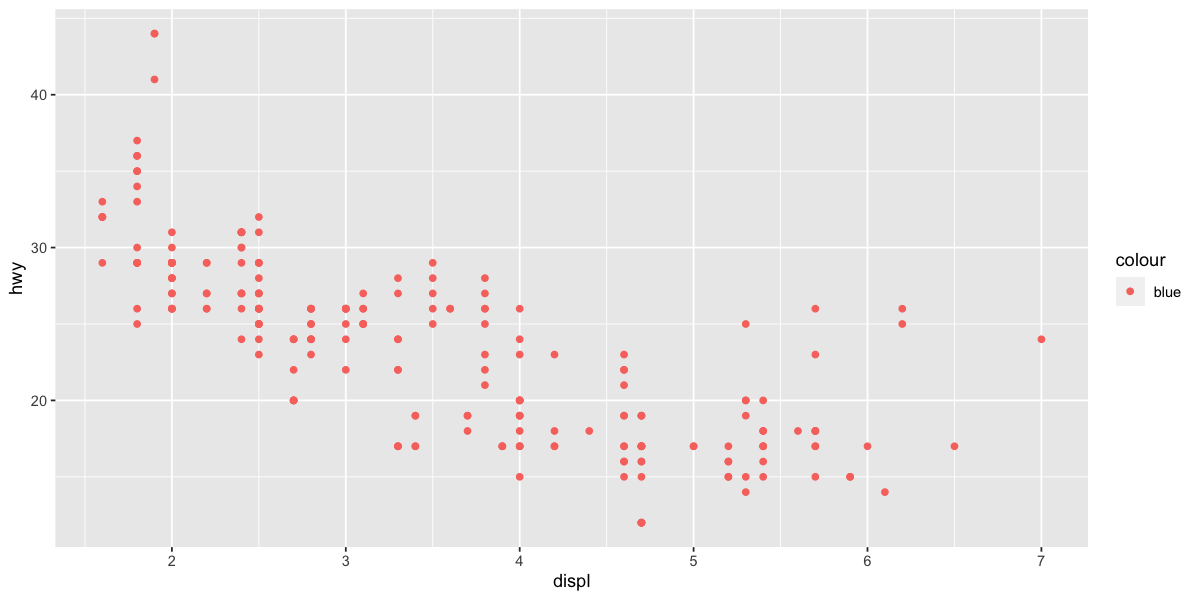

In [14]:
ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy, color = "blue"))

3. What does the stroke aesthetic do? What shapes does it work with? (Hint: use ?geom_point)

4. What happens if you map an aesthetic to something other than a variable name, like aes(color = displ < 5)? Note, you’ll also need to specify x and y.

## Geometric objects (geom)


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


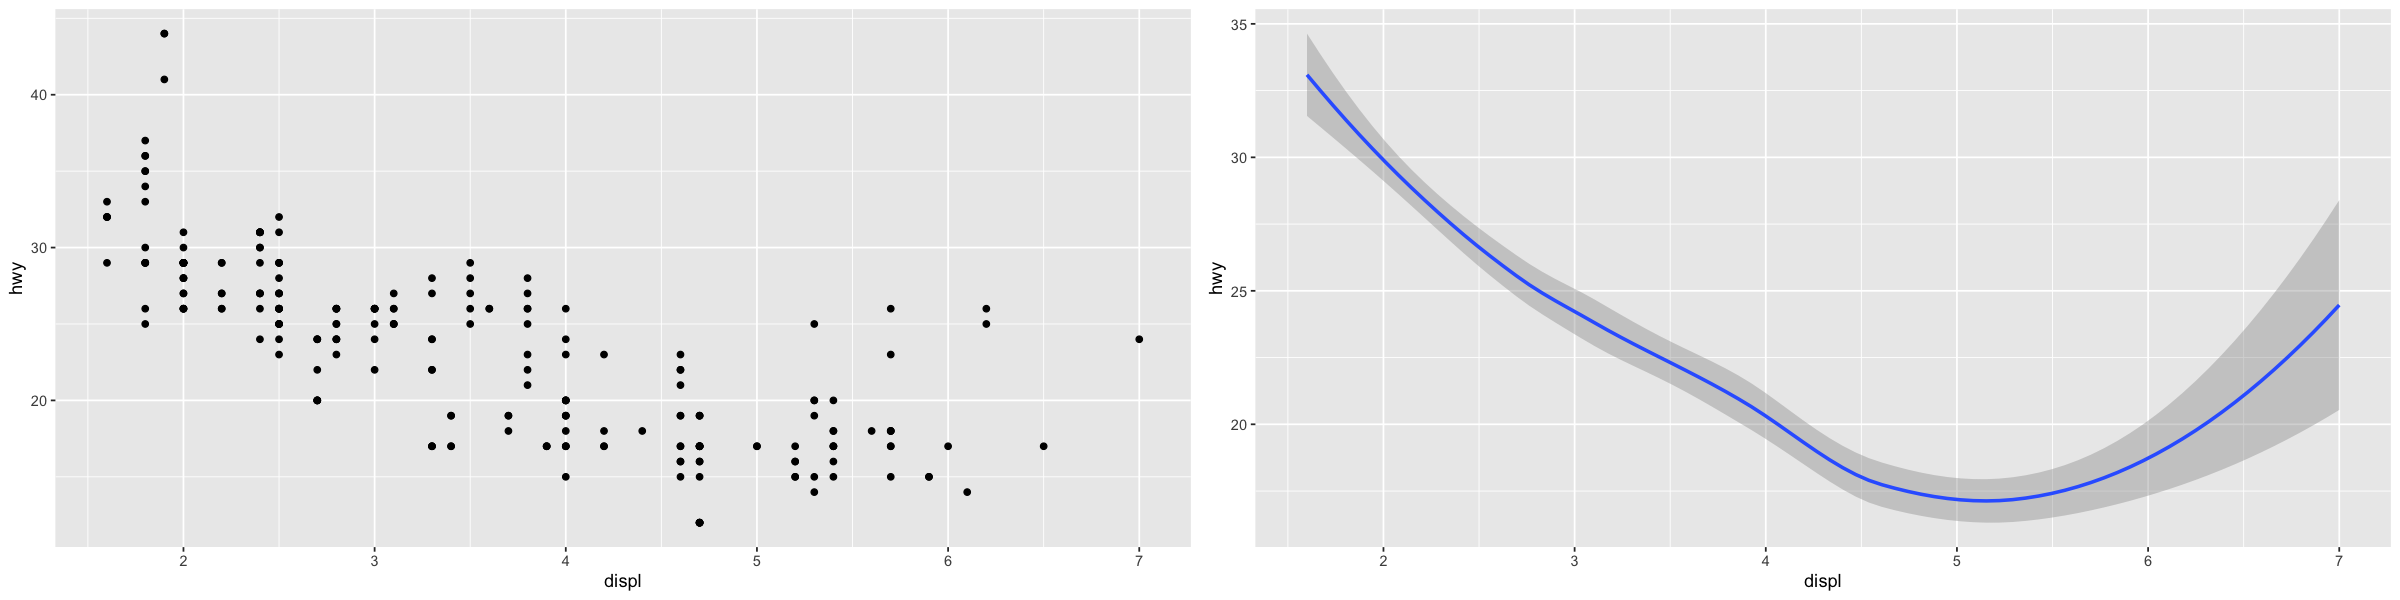

In [17]:
# Left
p1 <- ggplot(mpg, aes(x = displ, y = hwy)) + 
  geom_point()

# Right
p2 <- ggplot(mpg, aes(x = displ, y = hwy)) + 
  geom_smooth()
#> `geom_smooth()` using method = 'loess' and formula = 'y ~ x'
options(repr.plot.width = 20, repr.plot.height = 5)
grid.arrange(p1, p2, ncol=2)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


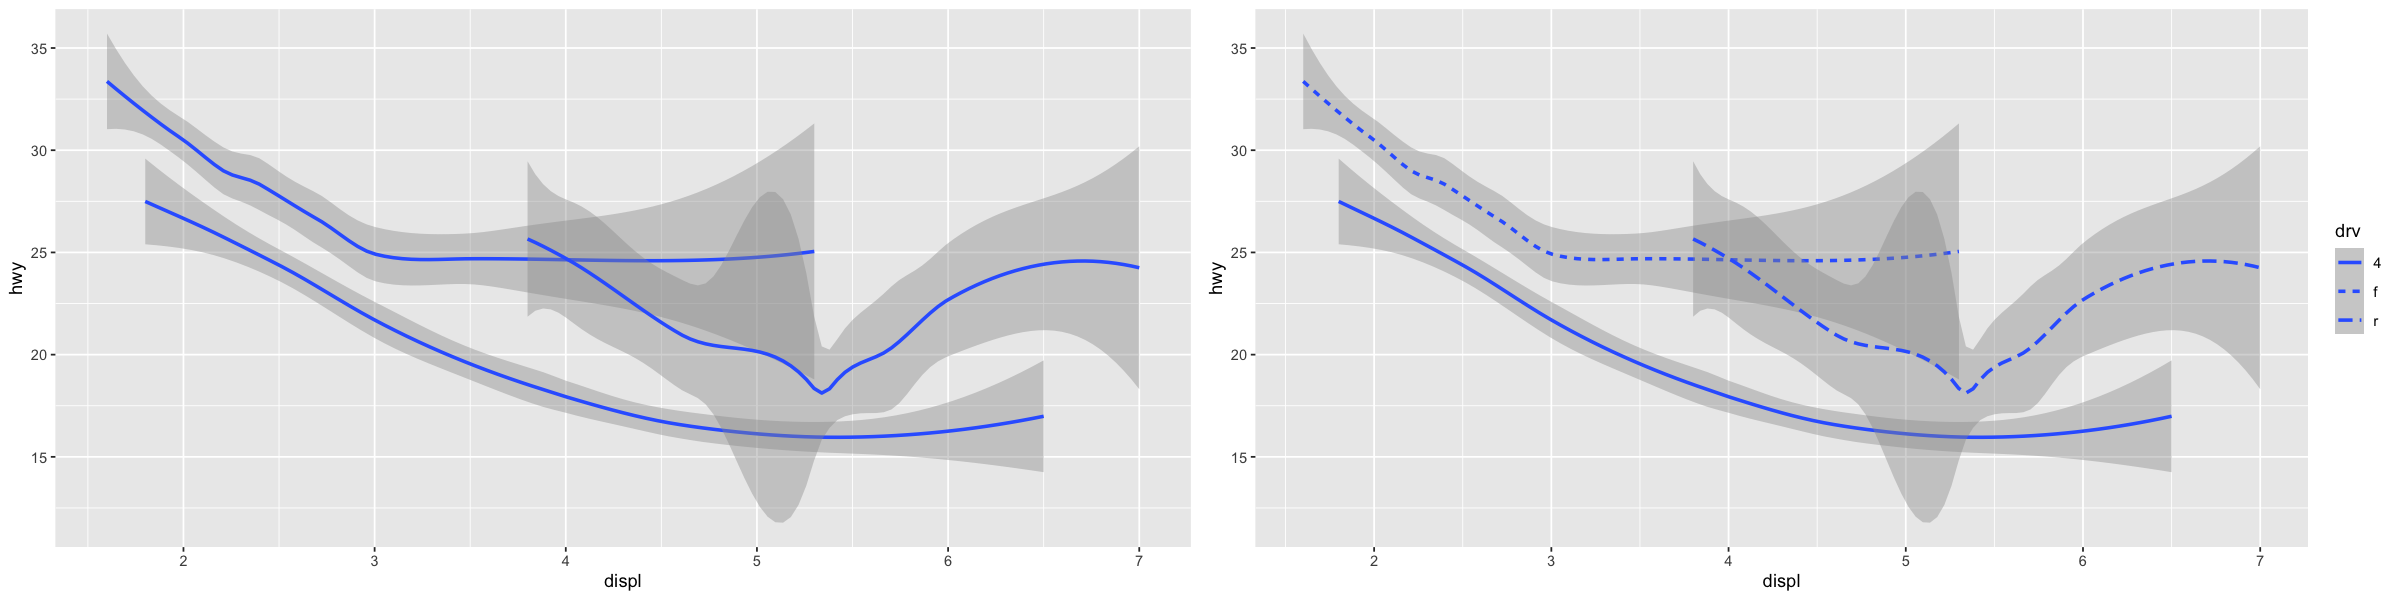

In [18]:
# Left
p1 <- ggplot(mpg, aes(x = displ, y = hwy, shape = drv)) + 
  geom_smooth()

# Right
p2 <- ggplot(mpg, aes(x = displ, y = hwy, linetype = drv)) + 
  geom_smooth()

grid.arrange(p1, p2, ncol=2)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


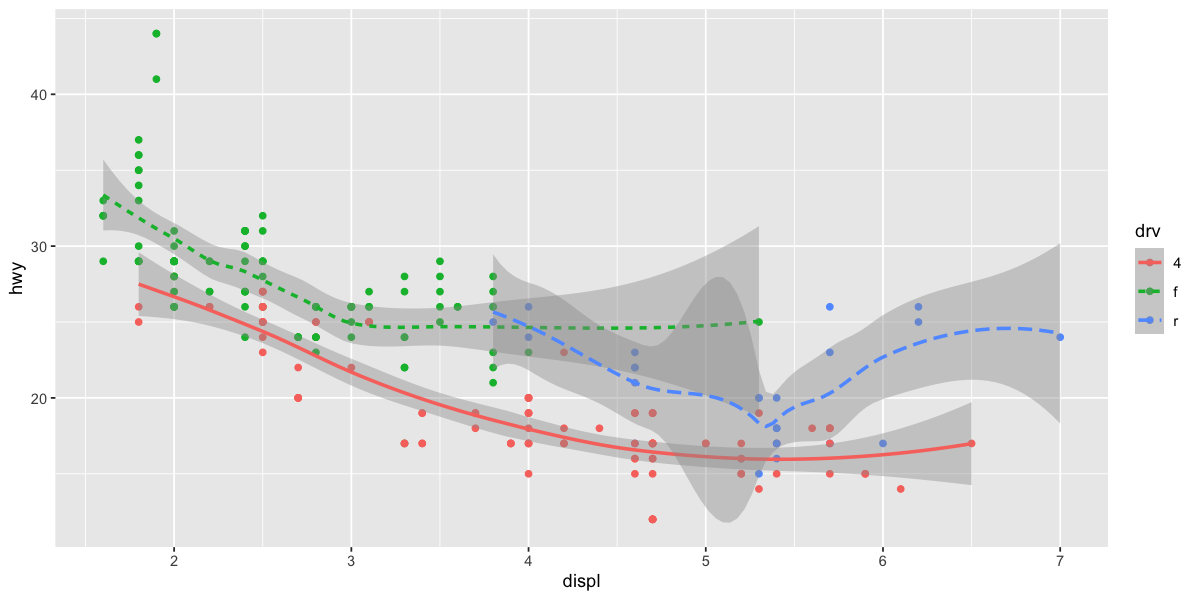

In [28]:
ggplot(mpg, aes(x = displ, y = hwy, color = drv)) + 
  geom_point() +
  geom_smooth(aes(linetype = drv))

options(repr.plot.width = 10, repr.plot.height = 5)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


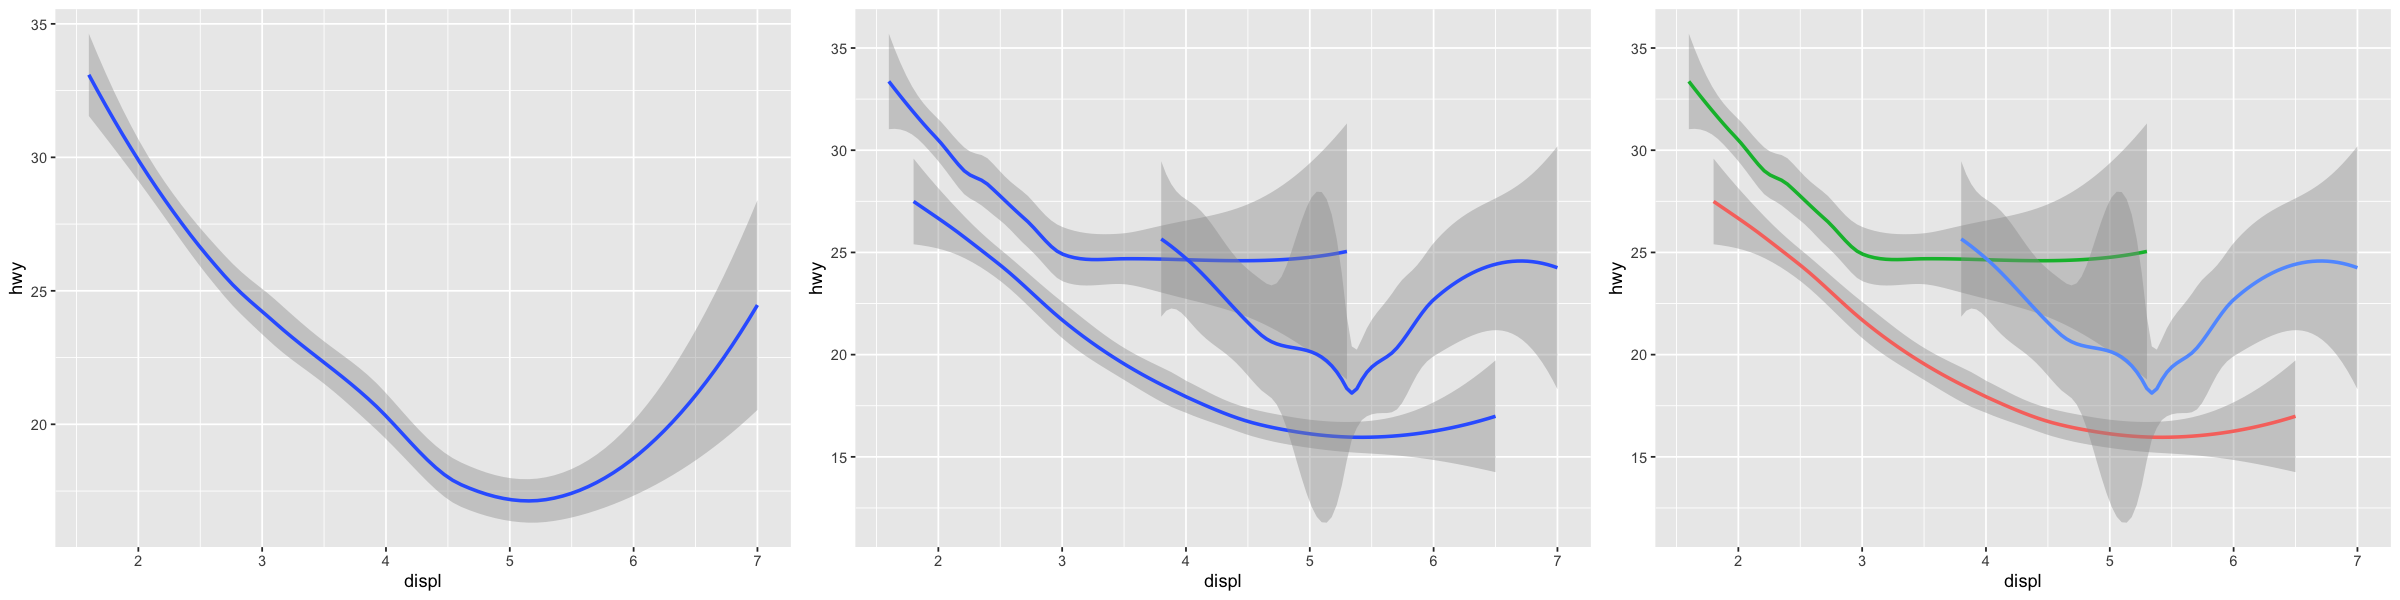

In [29]:
# Left
p1 <- ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_smooth()

# Middle
p2 <- ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_smooth(aes(group = drv))

# Right
p3 <- ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_smooth(aes(color = drv), show.legend = FALSE)

options(repr.plot.width = 20, repr.plot.height = 5)
grid.arrange(p1, p2, p3, ncol=3)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


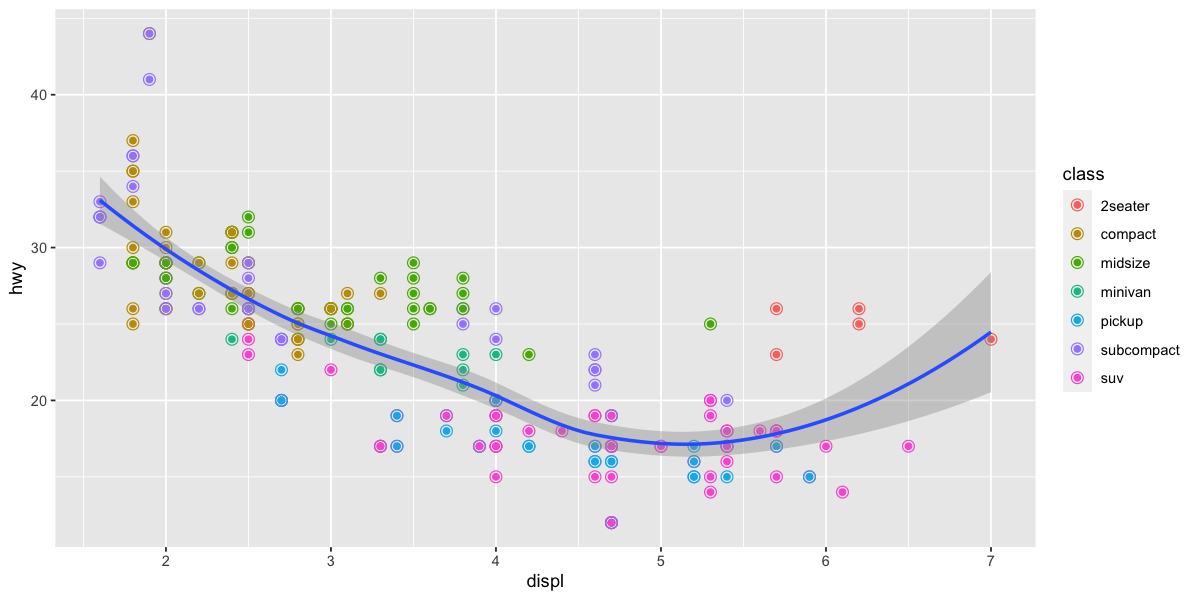

In [41]:
ggplot(mpg, aes(x = displ, y = hwy)) + 
  geom_point(aes(color = class)) + 
  geom_point( 
    aes(color = class), 
    shape = "circle open", 
    size = 3

    
  ) +
  geom_smooth()
options(repr.plot.width = 10, repr.plot.height = 5)

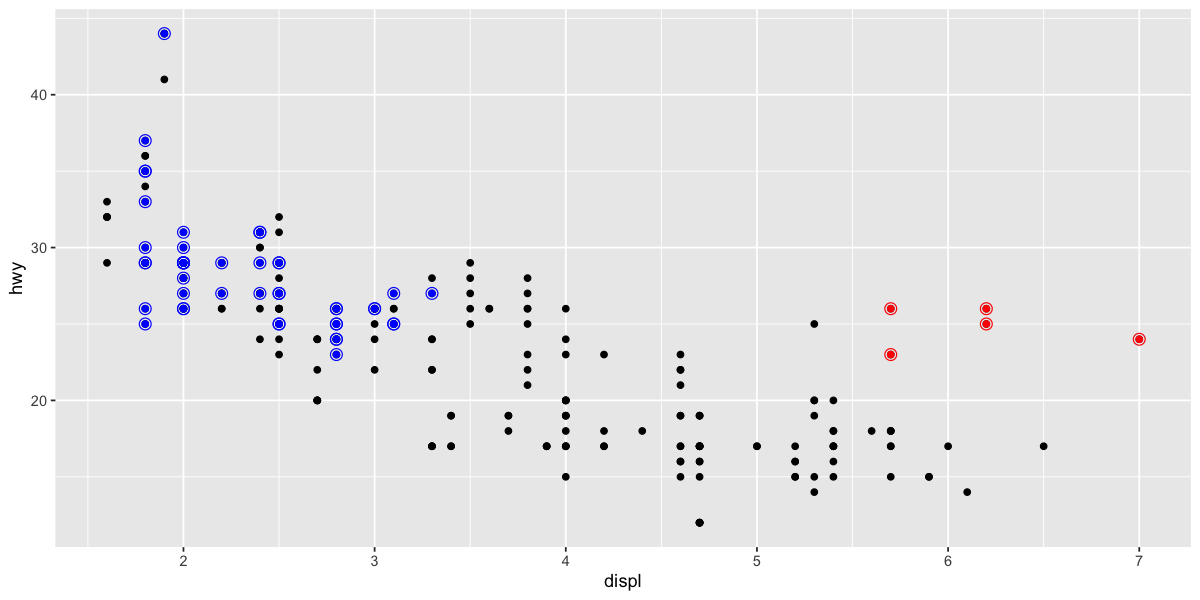

In [38]:
ggplot(mpg, aes(x = displ, y = hwy)) + 
  # Draw all black points
  geom_point() +
  # Draw red points of class 2seater
  geom_point(
    data = mpg |> filter(class == "2seater"), 
    color = "red"
  ) +
  # draw red circle around points of class 2seater
  geom_point(
    data = mpg |> filter(class == "2seater"), 
    shape = "circle open", size = 3, color = "red"
  ) +
    # Draw blue points of class compact
  geom_point(
    data = mpg |> filter(class == "compact"), 
    color = "blue"
  ) +
  # draw blue circle around points of class compact
  geom_point(
    data = mpg |> filter(class == "compact"), 
    shape = "circle open", size = 3, color = "blue"
  )

### Exercises 9.3


## Facets


### Exercises 9.4


## Statistical transformations


### Exercises 9.5


## Position adjustments


### Exercises 9.6


## Coordinate systems


### Exercises 9.7


## The layered grammar of graphics


## Summary